# Objectives

Questions to answer with the observations data: 

*Descriptive Questions: \
--How much is the total number of observations in the last 7 days across all parks ? \
--How are the observations in the last 7 days distrubuted across the parks ? \
--What's the most/least observed species across all parks ? \
--Which species were the most/least observed in each park ? \
--Which is the most observed species in the last 7 days for each park ? 

*Inferentiel Questions: \
--Is the number of observations in the last 7 days associated with the park name ? 

Questions to answer with the species_info data: 

*Descriptive Questions: \
--Most frequent Species category \
--Conservation_status Species \
--Species category for each conservation_status \
--Most frequent common_name

*Inferentiel Questions: \
--is species conservation_status associated with it's category ? \
--is species category associated with either or not the species is in need for intervention or not (conservations_status from nominal categorical into binary) ? 

# Importing Libs + loading dfs + Cleaning

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [281]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
observations = observations.drop_duplicates()
species_info = species_info.drop_duplicates()

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


DataFrame observations: Each row represents the number of observations for a species in a certain park

In [282]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


DataFrame species: Each row represents information about a species

## Reshaping the species_info dataframe into a new one without duplicates and in the same time without losing important informations

In [283]:
duplicated_df = species_info[species_info.duplicated(subset='scientific_name', keep=False)].sort_values(by='scientific_name')
duplicated_df

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",NaN
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,NaN
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",NaN
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,NaN
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",NaN
3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",NaN


In [284]:
three_duplicates_names = ['Myotis lucifugus', 'Puma concolor', 'Castor canadensis',
       'Procyon lotor', 'Streptopelia decaocto', 'Canis lupus',
       'Columba livia', 'Hypochaeris radicata', 'Holcus lanatus']

two_duplicated_names_df = duplicated_df[~(duplicated_df.scientific_name.isin(three_duplicates_names))]
three_duplicated_names_df = duplicated_df[duplicated_df.scientific_name.isin(three_duplicates_names)]

for two_duplicated_rows_of_scientif_name

In [285]:
two_duplicated_names_df

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",NaN
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,NaN
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",NaN
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,NaN
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",NaN
3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",NaN


In [286]:
common_name_rows_for_two_dup = []
for i in range(0, len(two_duplicated_names_df), 2):
    common_name_rows_for_two_dup.append(two_duplicated_names_df.iloc[i].common_names+', '+two_duplicated_names_df.iloc[i+1].common_names)


In [287]:
two_no_dup_df = two_duplicated_names_df.drop_duplicates(subset='scientific_name').sort_values(by='scientific_name')
two_no_dup_df['common_names'] = common_name_rows_for_two_dup

## Removing duplicate names in 'common_names', example: (Gray Wolf, Gray Wolf)
two_no_dup_df.common_names = two_no_dup_df.common_names.apply(lambda x: " ".join(sorted(set(x.split()), key=x.split().index)))

two_no_dup_df

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Bentgrass, Rhode Island Bent",NaN
2134,Vascular Plant,Agrostis gigantea,"Redtop, Black Bent, Water Bentgrass",NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Agrostis",NaN
2138,Vascular Plant,Agrostis scabra,"Rough Bentgrass, Hairgrass, Bent, Ticklegrass",NaN
4182,Vascular Plant,Agrostis stolonifera,"Carpet Bentgrass, Creeping Bent, Redtop, Redto...",NaN
...,...,...,...,...
328,Bird,Vireo solitarius,"Blue-Headed Vireo, Solitary Vireo",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Six-Weeks Grass, Desert Fescue",NaN
2330,Vascular Plant,Vulpia myuros,"Rattail Fescue, Foxtail Rat-Tail Rat-Tailed Fe...",NaN
2331,Vascular Plant,Vulpia octoflora,"Annual Fescue, Eight-Flower Six-Weeks Grass, P...",NaN


for three_duplicated_rows_of_scientif_name

In [288]:
common_name_rows_for_three_dup = []
for i in range(0, len(three_duplicated_names_df), 3):
    common_name_rows_for_three_dup.append(three_duplicated_names_df.iloc[i].common_names+', '+three_duplicated_names_df.iloc[i+1].common_names+', '+three_duplicated_names_df.iloc[i+2].common_names)

In [289]:
three_no_dup_df = three_duplicated_names_df.drop_duplicates(subset='scientific_name').sort_values(by='scientific_name')
three_no_dup_df['common_names'] = common_name_rows_for_three_dup

## Removing duplicate names in 'common_names', example: (Gray Wolf, Gray Wolf)
three_no_dup_df.common_names = three_no_dup_df.common_names.apply(lambda x: " ".join(sorted(set(x.split()), key=x.split().index)))
three_no_dup_df.loc[4514,['common_names']] = ['Eurasian Collared Dove, Collared-Dove']


three_no_dup_df

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
49,Mammal,Castor canadensis,"American Beaver, Beaver",NaN
4513,Bird,Columba livia,"Rock Pigeon, Common Dove, Dove",NaN
4236,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Yorkshire-Fog, Yorkshire F...",NaN
3488,Vascular Plant,Hypochaeris radicata,"Spotted Cats-Ear, Hairy Gosmore, Common Cat's-...",NaN
4467,Mammal,Myotis lucifugus,"Little Brown Myotis, Bat, Myotis",Species of Concern
3030,Mammal,Procyon lotor,"Common Raccoon, Northern Raccoon",NaN
16,Mammal,Puma concolor,"Panther (Mountain Lion), Mountain Lion, Cougar...",NaN
4514,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Collared-Dove",NaN


stacking all df's to create a new df with no duplicates

In [290]:
species_with_no_occurences_at_all = species_info.drop_duplicates(subset='scientific_name', keep=False).sort_values(by='scientific_name')

df_list = [species_with_no_occurences_at_all, two_no_dup_df, three_no_dup_df]
species_info_no_dup = pd.concat(df_list)

species_info = species_info_no_dup
species_info

,category,scientific_name,common_names,conservation_status
4061,Vascular Plant,Abies bifolia,Rocky Mountain Alpine Fir,NaN
5443,Vascular Plant,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN
1928,Vascular Plant,Abies fraseri,Fraser Fir,Species of Concern
2908,Nonvascular Plant,Abietinella abietina,Abietinella Moss,NaN
3736,Vascular Plant,Abronia ammophila,"Wyoming Sand Verbena, Yellowstone Sand Verbena",Species of Concern
...,...,...,...,...
3488,Vascular Plant,Hypochaeris radicata,"Spotted Cats-Ear, Hairy Gosmore, Common Cat's-...",NaN
4467,Mammal,Myotis lucifugus,"Little Brown Myotis, Bat, Myotis",Species of Concern
3030,Mammal,Procyon lotor,"Common Raccoon, Northern Raccoon",NaN
16,Mammal,Puma concolor,"Panther (Mountain Lion), Mountain Lion, Cougar...",NaN


# Analysis

## Observations DataFrame

### Descriptive questions:

 -How much is the total number of observations in the last 7 days across all parks ?

In [291]:
observations.observations.sum()

3312429

 -How are the sum of observations in the last 7 days distrubuted across the parks ?

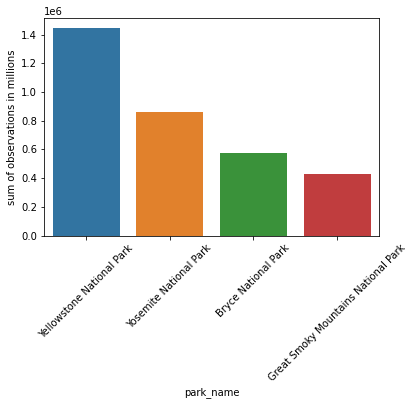

In [292]:
park_sum_observations = observations.groupby(['park_name']).observations.sum().reset_index().sort_values(by='observations', ascending=False)

sns.barplot(x=park_sum_observations.park_name, y=park_sum_observations.observations, order=park_sum_observations['park_name'])
plt.ylabel('sum of observations in millions')
plt.xticks(rotation = 45)
plt.show()

-Distribution of the observations column across all parks

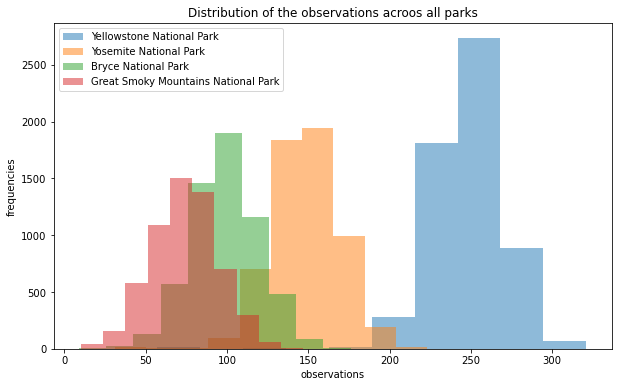

In [293]:
plt.figure(figsize=(10,6))
plt.hist(observations.observations[observations.park_name=='Yellowstone National Park'], alpha=0.5, label='Yellowstone National Park')
plt.hist(observations.observations[observations.park_name=='Yosemite National Park'], alpha=0.5, label='Yosemite National Park')
plt.hist(observations.observations[observations.park_name=='Bryce National Park'], alpha=0.5, label='Bryce National Park')
plt.hist(observations.observations[observations.park_name=='Great Smoky Mountains National Park'], alpha=0.5, label='Great Smoky Mountains National Park')
plt.title('Distribution of the observations acroos all parks')
plt.xlabel('observations')
plt.ylabel('frequencies')
plt.legend()
plt.show()

 -What's the most/least observed species across all parks ?

In [294]:
df = observations.groupby(['scientific_name']).observations.sum().reset_index().sort_values(by='observations', ascending=False)
print('most observed species:', df.iloc[0][0])

df = observations.groupby(['scientific_name']).observations.sum().reset_index().sort_values(by='observations', ascending=True)
print('Least observed species:', df.iloc[0][0])

most observed species: Holcus lanatus
Least observed species: Grus americana


 -Which species were the most/least observed in each park ?

In [295]:
# Most observed
parks_max_observations = observations.groupby(['park_name']).observations.max().reset_index()
parks_max_observations_species = parks_max_observations.merge(observations, on=['park_name', 'observations'])

for i in parks_max_observations_species.values:
    print("'{}' was the most observed species for the '{}' with {} observations." .format(i[2], i[0], i[1]))

'Valerianella radiata' was the most observed species for the 'Bryce National Park' with 176 observations.
'Sonchus asper ssp. asper' was the most observed species for the 'Great Smoky Mountains National Park' with 147 observations.
'Lycopodium tristachyum' was the most observed species for the 'Yellowstone National Park' with 321 observations.
'Ivesia shockleyi var. shockleyi' was the most observed species for the 'Yosemite National Park' with 223 observations.


In [296]:
# Least observed
parks_min_observations = observations.groupby(['park_name']).observations.min().reset_index()
parks_min_observations_species = parks_min_observations.merge(observations, on=['park_name', 'observations'])

for i in parks_min_observations_species.values:
    print("'{}' was the least observed species for the '{}' with {} observations." .format(i[2], i[0], i[1]))

'Corydalis aurea' was the least observed species for the 'Bryce National Park' with 9 observations.
'Collomia tinctoria' was the least observed species for the 'Great Smoky Mountains National Park' with 10 observations.
'Grus americana' was the least observed species for the 'Yellowstone National Park' with 57 observations.
'Noturus baileyi' was the least observed species for the 'Yosemite National Park' with 31 observations.


### Inferentiel questions

In [297]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

 -Is the number of observations in the last 7 days associated with the park name ?

In [298]:
### Meeting the assumptions of T-Tests, ANOVA, and Tukey:
# 1. The observations should be independently randomly sampled from the population DONE!
# 2. The standard deviations of the groups should be equal
print(observations.observations[observations.park_name=='Yellowstone National Park'].std())
print(observations.observations[observations.park_name=='Yosemite National Park'].std())
print(observations.observations[observations.park_name=='Bryce National Park'].std())
print(observations.observations[observations.park_name=='Great Smoky Mountains National Park'].std())
# 3. The data should be normally distributed…ish    DONE!
# 4. The groups created by the categorical variable must be independent

23.175947412133002
21.22054469873767
20.761238686735766
20.323467181702732


In [299]:
scipy.stats.f_oneway(
    observations.observations[observations.park_name=='Great Smoky Mountains National Park'], 
    observations.observations[observations.park_name=='Yosemite National Park'],
    observations.observations[observations.park_name=='Bryce National Park'],
    observations.observations[observations.park_name=='Yellowstone National Park']
    )

F_onewayResult(statistic=75014.12663046071, pvalue=0.0)

Since the pvalue is less than .05, we have sufficient evidence to say that the mean values across each group are not equal. \
Thus, we can proceed to perform Tukey’s Test to determine exactly which group means are different.

In [300]:
tukey = pairwise_tukeyhsd(endog=observations['observations'],
                          groups=observations['park_name'],
                          alpha=0.05)
print(tukey)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                              group2               meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------------------
                Bryce National Park Great Smoky Mountains National Park -24.7557 0.001  -25.7747 -23.7366   True
                Bryce National Park           Yellowstone National Park 148.9618 0.001  147.9427 149.9808   True
                Bryce National Park              Yosemite National Park  49.3271 0.001   48.3081   50.346   True
Great Smoky Mountains National Park           Yellowstone National Park 173.7175 0.001  172.6982 174.7367   True
Great Smoky Mountains National Park              Yosemite National Park  74.0827 0.001   73.0636  75.1019   True
          Yellowstone National Park              Yosemite National Park -99.6347 0.001 -100.6538

Since we have a pvalue that is less than .05 across each park and the other, we have sufficient evidence to say in our case the park name and the number of observations in the last 7 days are associated

## Species_info DataFrame

### Descriptive questions:

 -Most frequent Species category

c:\Users\Oussama ZIDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


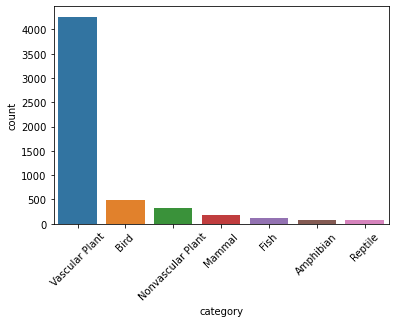

In [301]:
sns.countplot(species_info.category, order=species_info.category.value_counts().index)
plt.xticks(rotation = 45)
plt.show()

 -Species conservation_status

c:\Users\Oussama ZIDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


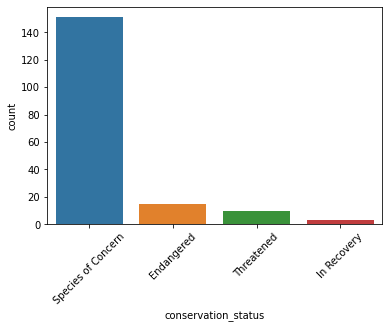

In [302]:
species_info_Intervention = species_info.conservation_status.reset_index()

sns.countplot(species_info_Intervention.conservation_status, order=species_info_Intervention.conservation_status.value_counts().index)
plt.xticks(rotation = 45)
plt.show()

 -Species conservation_status (Without No_intervention)

In [303]:
species_info.conservation_status = species_info.conservation_status.fillna('No_Intervention')

c:\Users\Oussama ZIDI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


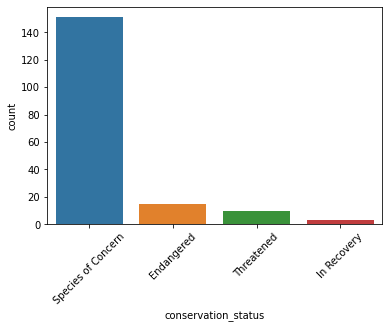

In [304]:
species_info_Intervention = species_info[species_info.conservation_status != 'No_Intervention']

sns.countplot(species_info_Intervention.conservation_status, order=species_info_Intervention.conservation_status.value_counts().index)
plt.xticks(rotation = 45)
plt.show()

Species category for each conservation_status

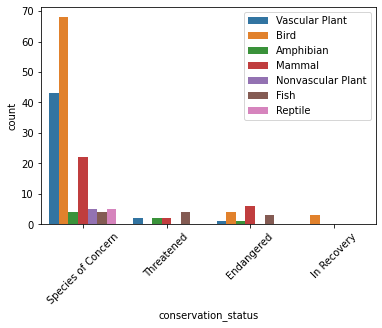

In [305]:
sns.countplot(data=species_info_Intervention, x='conservation_status', hue='category')
plt.legend(loc=1)
plt.xticks(rotation = 45)
plt.show()

#### Most frequent common_name

species_category = Mammal

In [306]:
species_info_no_dup2 = species_info_no_dup

In [307]:
species_info_no_dup = species_info_no_dup[species_info_no_dup.category=='Mammal']
species_info_no_dup

,category,scientific_name,common_names,conservation_status
3015,Mammal,Alces alces,"Eurasian Elk, Moose",No_Intervention
3016,Mammal,Alces alces shirasi,Yellowstone Moose,No_Intervention
3011,Mammal,Antilocapra americana,"Antelope, Pronghorn",No_Intervention
3033,Mammal,Antrozous pallidus,"Pallid Bat, Pallid Bat",Species of Concern
4474,Mammal,Aplodontia rufa californica,Sierra Nevada Mountain Beaver,Species of Concern
...,...,...,...,...
8,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
49,Mammal,Castor canadensis,"American Beaver, Beaver",No_Intervention
4467,Mammal,Myotis lucifugus,"Little Brown Myotis, Bat, Myotis",Species of Concern
3030,Mammal,Procyon lotor,"Common Raccoon, Northern Raccoon",No_Intervention


In [308]:
common_names = []
for line in species_info_no_dup.common_names:
    for word in (line.split(',')):
        common_names.append(word)

clean_common_names = []
for word in common_names:
    clean_common_names.append(word.strip())


In [309]:
count = pd.Series(clean_common_names).value_counts()
count[:20]

Bat                               4
Marsh Rice Rat                    2
Northern Flying Squirrel          2
Bison                             2
Mountain Lion                     2
Long-Legged Myotis                2
Muskrat                           2
Bighorn Sheep                     2
Red Fox                           2
Yuma Myotis                       2
Grizzly Bear                      2
Mountain Goat                     2
Mule Deer                         2
Golden-Mantled Ground Squirrel    2
Fisher                            2
Uinta Chipmunk                    2
American Mink                     2
Big-Eared Woodrat                 2
Myotis                            2
Pallid Bat                        2
dtype: int64

In [310]:
species_info_no_dup['is_bat'] = species_info_no_dup.common_names.apply(lambda x: True if 'bat'.lower() in x.lower() else False)
bats_info = species_info_no_dup[species_info_no_dup['is_bat']==True]

<ipython-input-310-29c2506e9033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_info_no_dup['is_bat'] = species_info_no_dup.common_names.apply(lambda x: True if 'bat'.lower() in x.lower() else False)


In [311]:
pd.merge(left=observations, right=bats_info).groupby(['park_name']).observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,2310
1,Great Smoky Mountains National Park,1687
2,Yellowstone National Park,5771
3,Yosemite National Park,3311


return the df to all categories instead of mamalls

In [312]:
species_info_no_dup = species_info_no_dup2

### Inferentiel questions:

--is species conservation_status associated with it's category ? 

In [313]:
## Assumptions of a Chi-Square Test
# 1. The observations should be independently randomly sampled from the population      DONE!
# 2. The categories of both variables must be mutually exclusive        DONE!
# 3. The groups should be independent       DONE!

In [314]:
cross_tab = pd.crosstab(species_info_Intervention['category'],
                            species_info_Intervention['conservation_status'], 
                               margins = False).sort_values(by=['Species of Concern', 'Endangered'], ascending=[False, False])
cross_tab = cross_tab[['Species of Concern', 'Endangered', 'Threatened', 'In Recovery']]
cross_tab

conservation_status,Species of Concern,Endangered,Threatened,In Recovery
category,,,,
Bird,68,4,0,3
Vascular Plant,43,1,2,0
Mammal,22,6,2,0
Nonvascular Plant,5,0,0,0
Reptile,5,0,0,0
Fish,4,3,4,0
Amphibian,4,1,2,0


In [315]:
stat, p, dof, expected = chi2_contingency(cross_tab)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.523096200068039e-05
Dependent (reject H0)


The variables (Species category) and (conservation_status) do have a significant relation

#### Is species category associated with either or not the species is in need for intervention or not ? 

In [316]:
species_info_no_dup['need_to_interfere'] = species_info_no_dup.conservation_status.apply(lambda x:  True if x != 'No_Intervention' else False)

interference_df = species_info_no_dup.groupby(['category', 'need_to_interfere']).common_names.count().reset_index()
interference_df = interference_df.pivot(
    index='category',
    columns='need_to_interfere',
    values='common_names'
).reset_index()

interference_df.columns = ['category', 'no_need_to_interfere', 'need_to_interfere']

interference_df['not_protected_perc'] = interference_df.need_to_interfere / (interference_df.need_to_interfere + interference_df.no_need_to_interfere) * 100
interference_df

,category,no_need_to_interfere,need_to_interfere,not_protected_perc
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,114,11,8.800000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


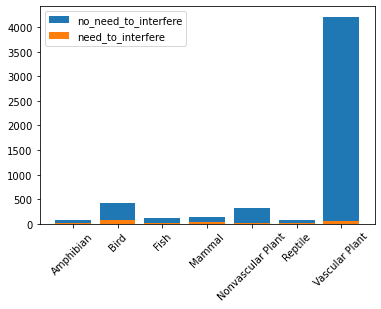

In [317]:
plt.bar(x=interference_df.category, height=interference_df.no_need_to_interfere)
plt.bar(x=interference_df.category, height=interference_df.need_to_interfere)
plt.legend(['no_need_to_interfere', 'need_to_interfere'])
plt.xticks(rotation = 45)
plt.show()

In [318]:
## Assumptions of a Chi-Square Test
# 1. The observations should be independently randomly sampled from the population      DONE!
# 2. The categories of both variables must be mutually exclusive        DONE!
# 3. The groups should be independent       DONE!

In [319]:
cross_tab = pd.crosstab(species_info_no_dup['category'],
                            species_info_no_dup['need_to_interfere'], 
                               margins = False)

cross_tab

need_to_interfere,False,True
category,,
Amphibian,72,7
Bird,413,75
Fish,114,11
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


In [320]:
stat, p, dof, expected = chi2_contingency(cross_tab)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 5.146759135430123e-89
Dependent (reject H0)
